In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as dt

In [3]:
retail = pd.read_csv("Online_Retail.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
retail.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
retail.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [20]:
order_wise = retail.dropna()

In [21]:
order_wise.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
order_wise['Amount']=order_wise['Quantity']*order_wise['UnitPrice']

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
order_wise.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
monetary=order_wise.groupby("CustomerID").Amount.sum()

In [30]:
monetary = monetary.reset_index()

In [31]:
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [33]:
frequency=order_wise[['CustomerID','InvoiceNo']]

In [34]:
frequency.head()

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365


In [36]:
k=frequency.groupby('CustomerID').InvoiceNo.count()

In [38]:
k=k.reset_index()

In [40]:
k.columns=["CustomerID", "Frequency"]

In [41]:
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [42]:
master = monetary.merge(k, on = "CustomerID", how = "inner")

In [43]:
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [44]:
master.count()

CustomerID    4372
Amount        4372
Frequency     4372
dtype: int64

In [45]:
recency=order_wise[['CustomerID','InvoiceDate']]

In [56]:
maximum = max(recency.InvoiceDate)

In [60]:
maximum = maximum + pd.DateOffset(days=1)


In [61]:
recency['diff'] = maximum - recency.InvoiceDate

/Users/vijaybmani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [63]:
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())

In [64]:
df.head()

,diff
CustomerID,
12346.0,326 days 02:33:00
12347.0,2 days 20:58:00
12348.0,75 days 23:37:00
12349.0,19 days 02:59:00
12350.0,310 days 20:49:00


In [65]:
df = df.reset_index()

In [66]:
df.columns = ["CustomerID", "Recency"]


In [67]:
df.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [90]:
RFM = k.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")

In [91]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e8accc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e8c39b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e8acf28>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e8c3dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e8d63c8>],
 'means': []}

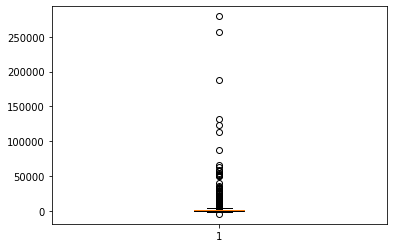

In [92]:
plt.boxplot(RFM.Amount)

In [95]:
Q1 = RFM.Amount.quantile(0.25)

In [96]:
Q3 = RFM.Amount.quantile(0.75)


In [97]:
Q3

1611.7249999999995

In [98]:
IQR = Q3 - Q1

In [99]:
IQR

1318.3624999999993

In [100]:
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e638be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e638eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e6387f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e650940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e650c88>],
 'means': []}

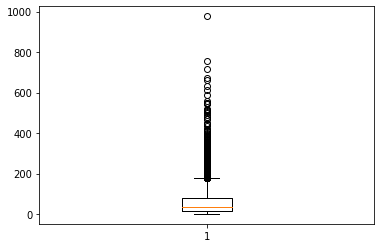

In [101]:
plt.boxplot(RFM.Frequency)

In [102]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1

In [103]:
IQR

65.0

In [104]:
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e7aefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e7c9940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e7aee80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e7c9fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e7c9f60>],
 'means': []}

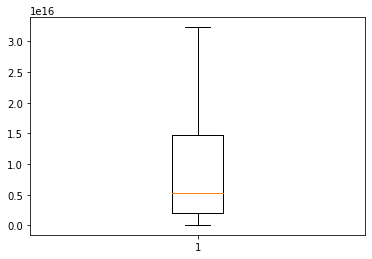

In [105]:
plt.boxplot(RFM.Recency)

In [106]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2e976b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2e976f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2e976780>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2e9888d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2e988c18>],
 'means': []}

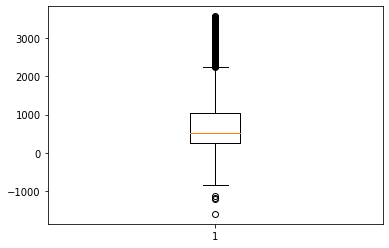

In [107]:
plt.boxplot(RFM.Amount)

In [108]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [109]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

In [110]:
RFM_norm1.head()

,Frequency,Amount,Recency
0,2,0.00,326
2,31,1797.24,75
3,73,1757.55,19
4,17,334.40,310
5,95,1545.41,36


In [111]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [113]:
RFM_norm1

array([[-1.07094871, -1.04161396,  2.13642223],
       [-0.3754979 ,  1.38529792, -0.28204953],
       [ 0.63170672,  1.33170234, -0.82162889],
       ...,
       [-0.9510434 , -0.93247827,  0.73929711],
       [-0.80715703, -0.80314128, -0.92761769],
       [ 0.55976353,  1.43936613, -0.59038059]])

In [122]:
RFM_norm1.shape
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()


,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


In [123]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [124]:
hopkins(RFM_norm1)

0.8884673365177785

In [125]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster.unsupervised:

silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is 2 <= n_labels <= n_samples - 1.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indicate tha

In [126]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

In [129]:
sse_

[[2, 0.42929467976639346],
 [3, 0.43980698267825724],
 [4, 0.40851721359807264],
 [5, 0.3886777571696285],
 [6, 0.3542843579477528],
 [7, 0.33213360229279276],
 [8, 0.34202111750388847],
 [9, 0.3487246454542844],
 [10, 0.35291498685570816],
 [11, 0.32377487962939144],
 [12, 0.30492878656461314],
 [13, 0.30871994933401387],
 [14, 0.3126430375045317]]

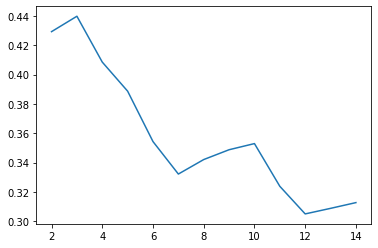

In [130]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

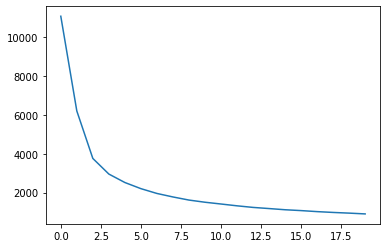

In [131]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [132]:
pd.RangeIndex(len(RFM.index))

RangeIndex(start=0, stop=3697, step=1)

In [160]:
# analysis of clusters formed


RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
RFM_km.head()


,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,326 days 02:33:00,2
1,12348.0,31,1797.24,75 days 23:37:00,0
2,12349.0,73,1757.55,19 days 02:59:00,0
3,12350.0,17,334.40,310 days 20:49:00,2
4,12352.0,95,1545.41,36 days 22:13:00,1


In [158]:
RFM_km.Recency.dt.days.head()

0    326
1     75
2     19
3    310
4     36
Name: Recency, dtype: int64

In [159]:


RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [161]:
km_clusters_amount

,Amount
ClusterID,
0,1202.896078
1,912.557139
2,327.037096
3,358.104633
4,2471.402482


In [162]:
km_clusters_recency

,Recency
ClusterID,
0,50.213763
1,53.980926
2,262.393839
3,57.514953
4,38.198910


In [164]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()


,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,1202.896078,53.698389,50.213763
1,1,912.557139,114.021798,53.980926
2,2,327.037096,20.558856,262.393839
3,3,358.104633,23.355215,57.514953
4,4,2471.402482,117.888283,38.198910


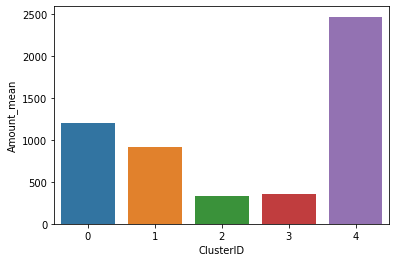

In [165]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)



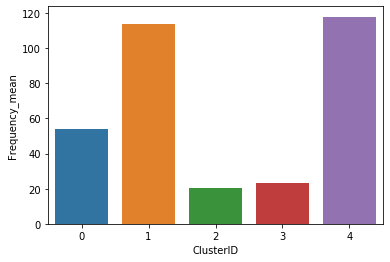

In [166]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

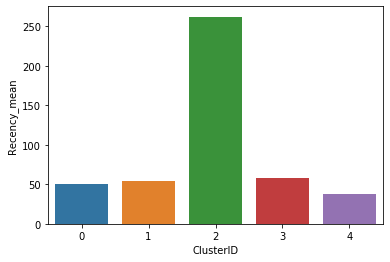

In [167]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [254]:
df = pd.read_csv('Cricket.csv',  sep = ',',encoding = "ISO-8859-1", header= 0)

In [255]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [256]:
df.count()

Player    79
Span      79
Mat       79
Inns      79
NO        79
Runs      79
HS        79
Ave       79
BF        79
SR        79
100       79
50        79
0         79
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3102d7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a31038ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a310380f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a31038fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3103f5c0>],
 'means': []}

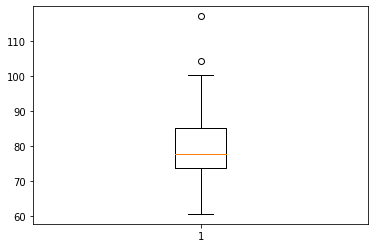

In [219]:
plt.boxplot(df.SR)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a315ebf98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a315f56d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a315ebba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a315f5d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a315f5e48>],
 'means': []}

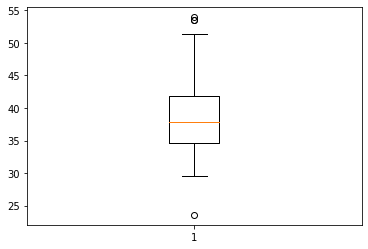

In [220]:
plt.boxplot(df.Ave)

In [221]:
Q1 = df_final.Ave.quantile(0.25)
Q3 = df_final.Ave.quantile(0.75)
IQR = Q3 - Q1


In [222]:
Q1

34.49

In [223]:
Q3

41.675000000000004

In [224]:
df=df[(df.Ave >= Q1 - 1.5*IQR) & (df.Ave <= Q3 + 1.5*IQR)]

In [225]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


{'whiskers': [<matplotlib.lines.Line2D at 0x1a31694e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3169e4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31694a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3169eb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3169eeb8>],
 'means': []}

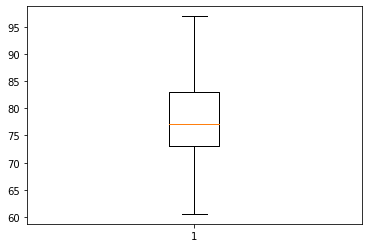

In [226]:
plt.boxplot(df_final.SR)

In [227]:
Q1 = df_final.SR.quantile(0.25)
Q3 = df_final.SR.quantile(0.75)
IQR = Q3 - Q1

df=df[(df.SR >= Q1 - 1.5*IQR) & (df.SR <= Q3 + 1.5*IQR)]

In [250]:
df.count()

Player    74
Span      74
Mat       74
Inns      74
NO        74
Runs      74
HS        74
Ave       74
BF        74
SR        74
100       74
50        74
0         74
dtype: int64

In [257]:
df_final=df[['SR','Ave']]

In [258]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_std = standard_scaler.fit_transform(df_final)

In [259]:
df_std

array([[ 0.70315153,  1.07229395],
       [-0.0441395 ,  0.58772461],
       [ 0.1109969 ,  0.59622582],
       [ 1.20709133, -1.04790945],
       [-0.03399986, -0.87618487],
       [-0.51259058,  0.16946476],
       [-0.64947564,  0.99238251],
       [-0.56734461,  0.42450125],
       [-0.8167796 ,  0.108256  ],
       [ 0.02176813,  0.33268811],
       [ 0.70315153,  0.12695867],
       [-0.42538973,  0.54181804],
       [ 1.78910632, -0.44772356],
       [ 0.95258652,  2.17575185],
       [-0.53489778, -0.2725985 ],
       [ 2.1247282 ,  2.5549061 ],
       [ 0.1860302 , -0.61604765],
       [ 0.58958763, -0.20288853],
       [ 0.13938788,  0.11675721],
       [-0.86747777,  0.52311536],
       [ 0.84916225, -0.3355075 ],
       [-1.64315977,  0.48400977],
       [-1.17369472, -0.16208269],
       [-0.24287632,  0.14056062],
       [ 2.53842527, -0.590544  ],
       [ 1.1857981 ,  2.62121559],
       [ 0.4020044 , -0.40691772],
       [ 3.82311689, -2.5424233 ],
       [-0.79143052,

In [297]:
df_std.shape
df_std = pd.DataFrame(df_std)
df_std.columns = ['SR','Ave']
df_std.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [261]:
hopkins(df_std)

0.7727213157254094

In [262]:
model_clus5 = KMeans(n_clusters = 4, max_iter=200,random_state=100)
model_clus5.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [263]:
model_clus5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [268]:
df_1=df['Player']

df_std_f = pd.concat([df, pd.Series(model_clus5.labels_)], axis=1)

In [269]:
df_std_f.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [270]:
df_std_f.columns = ['Player', 'ClusterID']

ValueError: Length mismatch: Expected axis has 14 elements, new values have 2 elements

In [271]:
df_std_f.head(100)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,1
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,1
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13,1
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1


In [248]:
pd.set_option('display.max_rows', 500) 

In [253]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16
8,R Dravid (Asia/ICC/INDIA),1996-2011,344,318,40,10889,153,39.16,15284,71.24,12,83,13
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16


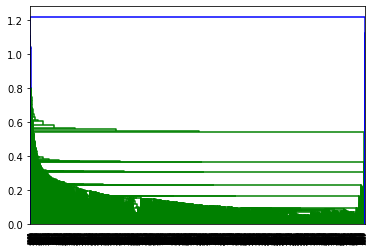

In [273]:
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# heirarchical clustering
mergings = linkage(RFM_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

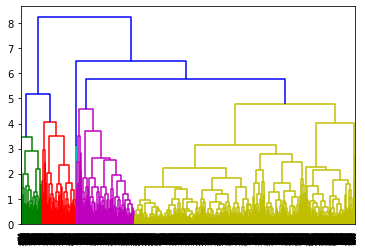

In [278]:
mergings = linkage(RFM_norm1, method = "complete", metric='euclidean')
dendrogram(mergings,color_threshold=5)
plt.show()

In [279]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([RFM, clusterCut], axis=1)
RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

In [280]:
RFM_hc.head()

,CustomerID,Frequency,Amount,Recency,ClusterID
0,12346.0,2,0.00,326 days 02:33:00,0
1,12348.0,31,1797.24,75 days 23:37:00,1
2,12349.0,73,1757.55,19 days 02:59:00,1
3,12350.0,17,334.40,310 days 20:49:00,0
4,12352.0,95,1545.41,36 days 22:13:00,2


In [281]:
#summarise
RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [282]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,401.831170,23.929069,131.066011
1,1,1787.153319,44.943966,38.547414
2,2,2324.569366,122.145889,34.856764
3,3,915.359751,89.739875,65.752336
4,4,-997.147143,6.142857,218.285714


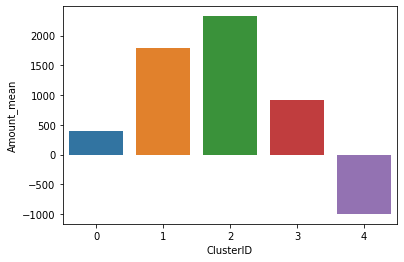

In [283]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

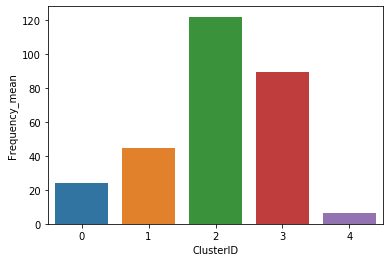

In [284]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

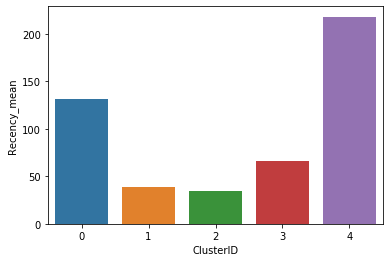

In [285]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

In [286]:
np.sqrt(17)

4.123105625617661

In [290]:
a=pd.Series([6,1,2,4,5,11])

In [291]:
b=pd.Series([0,2,7,6,3,1])

In [292]:
c = pd.concat([a, b], axis=1)

In [294]:
c.columns=['X','Y']

In [295]:
c

,X,Y
0,6,0
1,1,2
2,2,7
3,4,6
4,5,3
5,11,1


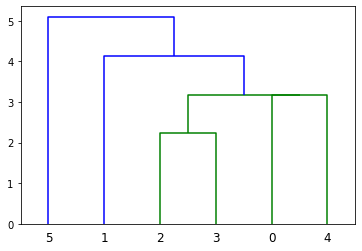

In [296]:
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# heirarchical clustering
mergings = linkage(c, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

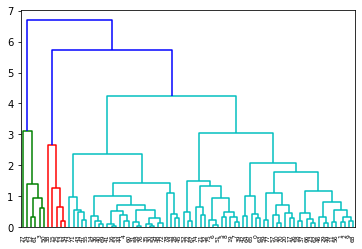

In [306]:
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# heirarchical clustering
mergings = linkage(df_std, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [307]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
player = pd.concat([df_1, clusterCut], axis=1)
player.columns=['player','part']

In [312]:
player[player['part']==0]

,player,part
0,SR Tendulkar (INDIA),0
1,KC Sangakkara (Asia/ICC/SL),0
2,RT Ponting (AUS/ICC),0
5,Inzamam-ul-Haq (Asia/PAK),0
6,JH Kallis (Afr/ICC/SA),0
7,SC Ganguly (Asia/INDIA),0
8,R Dravid (Asia/ICC/INDIA),0
9,BC Lara (ICC/WI),0
10,TM Dilshan (SL),0
11,Mohammad Yousuf (Asia/PAK),0


In [315]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [314]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [316]:
bank = pd.read_csv('bankmarketing.csv')